 # Data Preparation

### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer


### Load the Weather Dataset

In [3]:
weather_data = pd.read_csv('C:/Users/Vaibhav/Desktop/Project2/weather.csv')


### Explore the Dataset

### Display basic information about the dataset

In [5]:
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

### Display summary statistics


In [6]:
print(weather_data.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

### Check for missing values

In [7]:
print(weather_data.isnull().sum())

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


### Drop columns with a high percentage of missing values

In [8]:
# Deleting the columns having the 80% of data values missing
weather_data = weather_data.dropna(thresh=len(weather_data)*0.8, axis=1)

### Fill missing values with mean for numerical columns

In [9]:
weather_data = weather_data.fillna(weather_data.mean(numeric_only=True)) # [Taking only numerical columns]

### For categorical columns, you can fill missing values with the mode

In [10]:
#Using apply function to replace the missing cell with the mode of the corresponding column
weather_data = weather_data.apply(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan))

### Check if there are any remaining missing values

In [11]:
print(weather_data.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


### Detect outliers using box plots or other methods

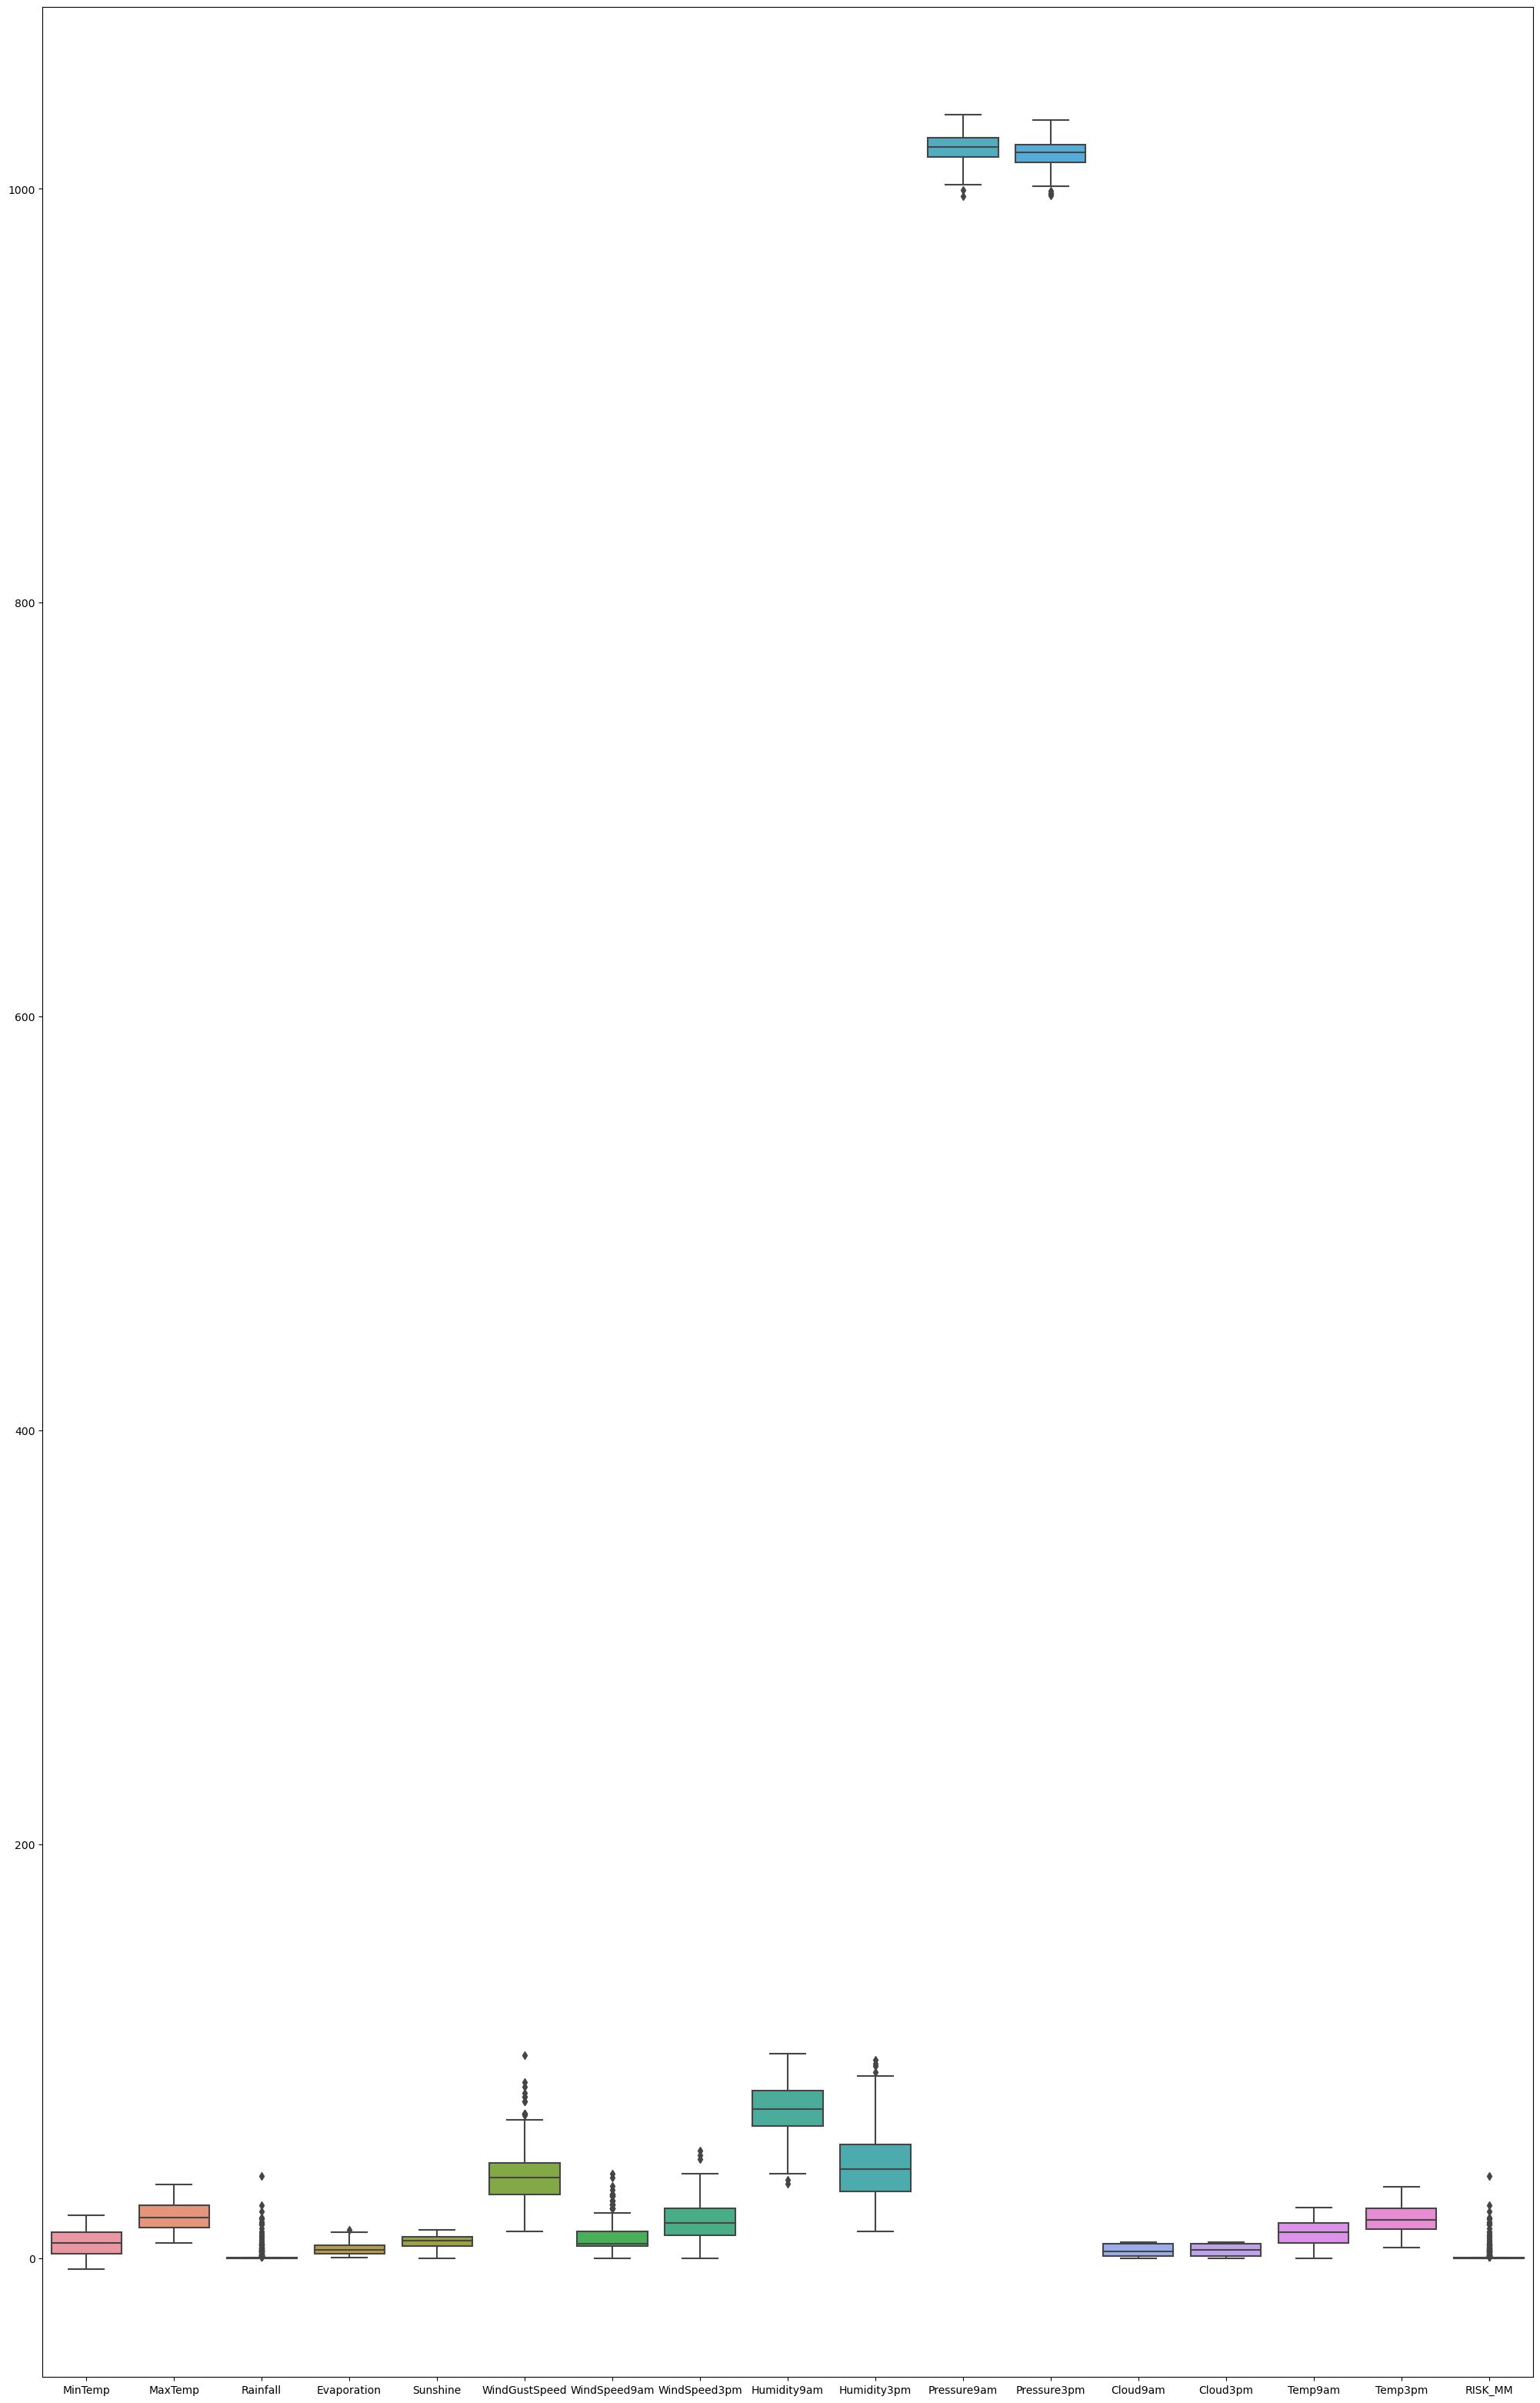

In [131]:
plt.figure(figsize=(25, 40)) # [setting plot size of 25*40] 
sns.boxplot(data=weather_data)
plt.show()

### Handling outliers

In [12]:
# Use the parameters you require for pair plot analysis in numerical_columns given below
numerical_variables = weather_data.select_dtypes(include=np.number).columns.tolist()
print("All numerical variables:",numerical_variables)

# Handling outliers for each numerical column
for column in numerical_variables:
    # Calculate upper and lower limits based on the characteristics of each column
    upper_limit = weather_data[column].mean() + 3 * weather_data[column].std()
    lower_limit = weather_data[column].mean() - 3 * weather_data[column].std()

    # Replace values exceeding the limits with the limits
    weather_data[column] = np.where(weather_data[column] > upper_limit, upper_limit, weather_data[column])
    weather_data[column] = np.where(weather_data[column] < lower_limit, lower_limit, weather_data[column])


All numerical variables: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


### Create visualizations to understand the data

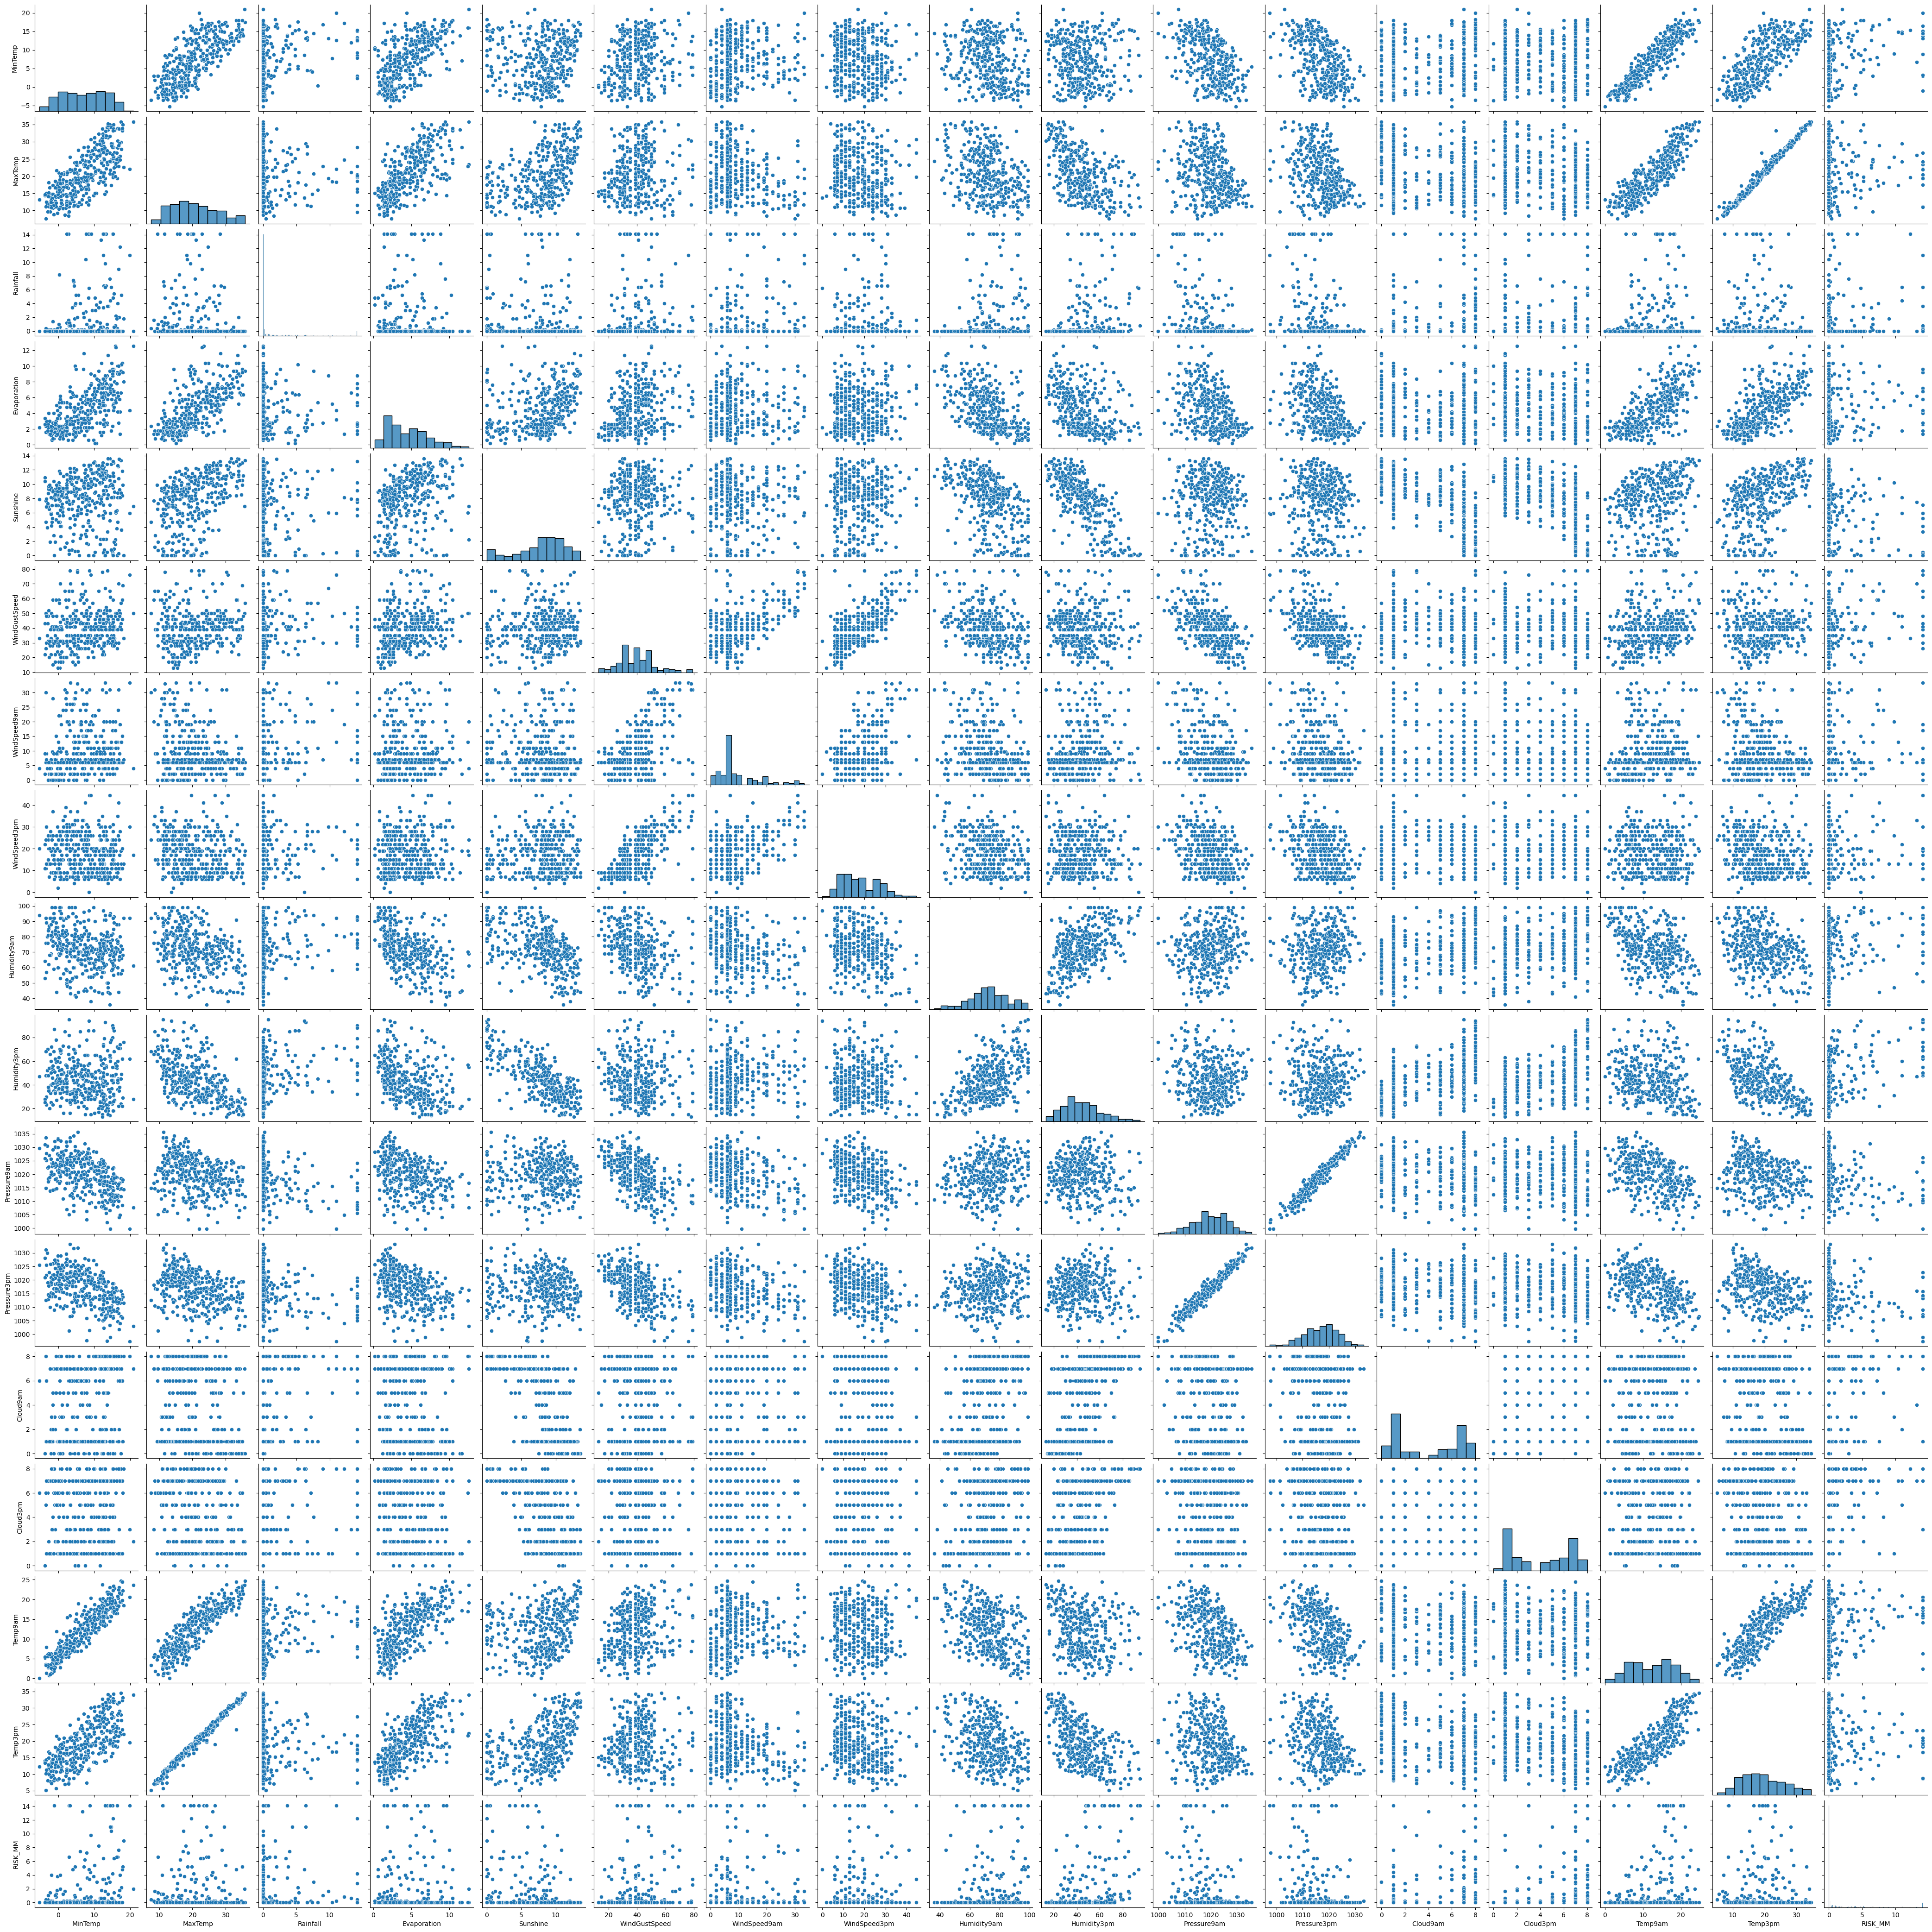

In [133]:
#given command will show the pairplot of all the factors ,for pairplot of specied factors ,make change in numerical_column array above.
sns.pairplot(weather_data)
plt.show()

# Correlation Analysis

### Calculate the correlation matrix

In [13]:
correlation_matrix = weather_data.corr(numeric_only=True) #[taking only numerical columns]

### Visualize the correlation matrix using a heatmap

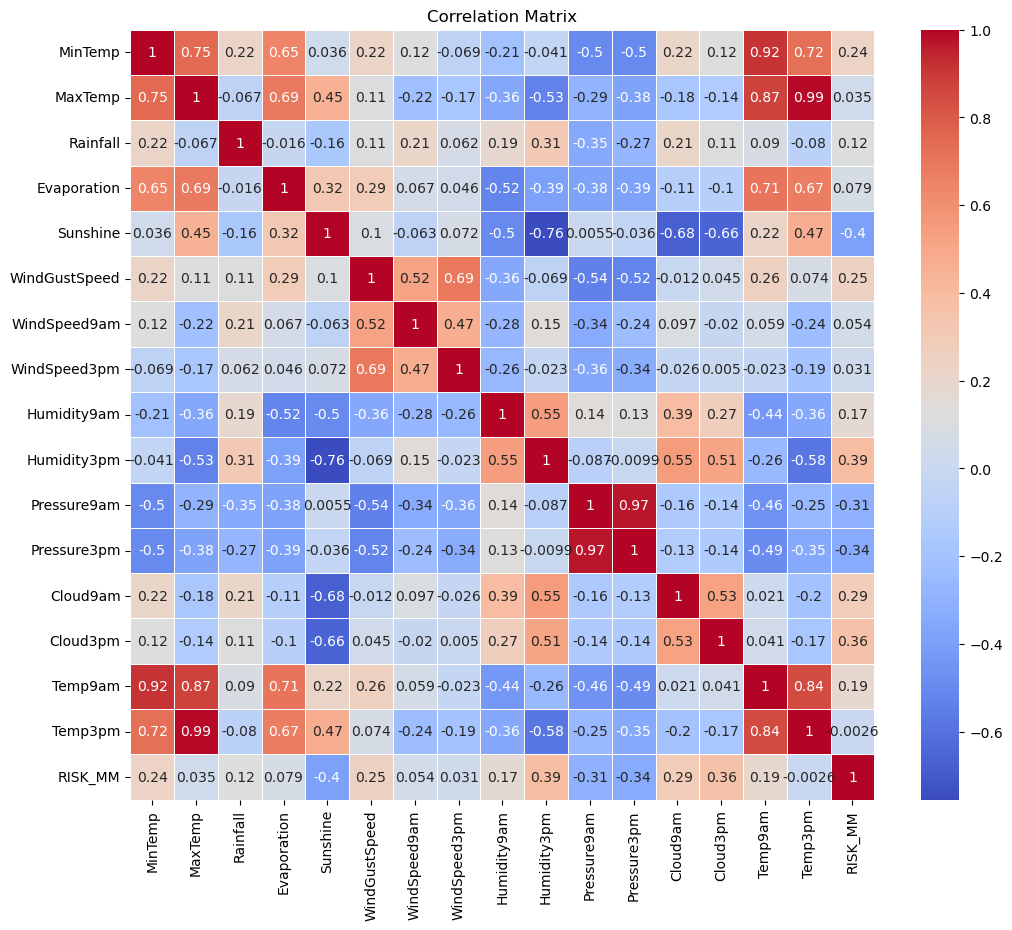

In [135]:
plt.figure(figsize=(12, 10)) #[Plot size of 12*10]
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Regression Analysis

### *Getting and preparing the data for regression 

In [14]:
# Encode categorical variables RainToday and RainTomorrow, and here it is binary encoding
weather_data['RainToday'] = weather_data['RainToday'].map({'No': 0, 'Yes': 1})
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Note:Make sure to run it

##   I) Regression Model of "MaxTemp"

### Training and Testing of model

In [15]:
# Choose a target variable and use all available numerical columns as predictor variables

current_target_variable = 'MaxTemp'
current_predictor_variables = [var for var in numerical_variables if var != current_target_variable]

# Split the dataset into training and testing sets as X_train, X_test, y_train and y_test
X = weather_data[current_predictor_variables]
y = weather_data[current_target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model named as model
model = LinearRegression()

# Train the model on the training set(X_train, y_train) by fitting it in model created
model.fit(X_train, y_train)

# Make predictions(y_pred) on the testing set(X_test)
y_pred = model.predict(X_test)

### Displaying the predicted values along with their actual values as per the Weather.csv file

In [16]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results.index = results.index + 2  # Increase each index by 2
results.index.name = 'Row no.'  # Add a heading for the index column

print(results)

         Actual  Predicted
Row no.                   
195        19.2  19.827415
35         26.5  26.537425
17         32.1  31.987313
312        16.1  16.164858
59         28.3  28.963753
...         ...        ...
84         22.5  23.854116
96         29.6  30.830890
194        17.4  18.220667
309        12.1  12.135854
213        18.0  18.095652

[74 rows x 2 columns]


***Here, row no. is the number of the row as per weather.csv file beside which is given Actual values and 
predicted values from the model created.***

***It is also showing clearly that testing set had predicted 74 values .***

### Analyzing the accuracy of mode

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.3552486957491057
R-squared: 0.9679831833477681


A low MSE indicates good accuracy of the model in predicting numeric values.
A high R-squared indicates that a large proportion of the variance in the target variable is explained by the model.

Hence, it is a good regression model for MaxTemp

##   II) Regression Model of "RainToday"

### Training and Testing of mode

In [18]:
# Choose a target variable as in above regression model and use all available numerical columns as predictor variables
current_target_variable1 = 'RainToday'
current_predictor_variables1 = [var for var in numerical_variables if var != current_target_variable1]

# Split the dataset into training and testing sets as X_train1, X_test1, y_train1 and y_test1
X1 = weather_data[current_predictor_variables1]
y1 = weather_data[current_target_variable1]
X_trainset1, X_testset1, y_trainset1, y_testset1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create a logistic regression model named as model1
model1 = LogisticRegression(max_iter=1000)  # Increased max_iter to avoid convergence warning

# Fit the model on the training set
model1.fit(X_trainset1, y_trainset1)

# Make predictions on the testing set
y_predict1 = model1.predict(X_testset1)


### Displaying the predicted values along with their actual values as per the Weather.csv file

***Predicting whether it will rain today or not***

In [19]:
# Save the current display options(to decide no. of rows to print)
original_max_rows = pd.get_option('display.max_rows')

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the actual and predicted values with index and heading
results1 = pd.DataFrame({'Actual': y_testset1, 'Predicted': y_predict1})

# Converting back '0' to 'No' and '1 to 'True 
results1['Actual'] = results1['Actual'].map({0: 'No', 1: 'Yes'})
results1['Predicted'] = results1['Predicted'].map({0: 'No', 1: 'Yes'})

results1.index = results1.index + 2  # Increase each index by 2
results1.index.name = 'Row no.'  # Add a heading for the index column

print(results1)

# Reset display option to its original value(so that other dataframes dont get effected later)
pd.set_option('display.max_rows', original_max_rows)




        Actual Predicted
Row no.                 
195         No        No
35         Yes       Yes
17          No        No
312         No        No
59         Yes       Yes
185         No        No
78          No        No
121         No        No
154         No        No
128         No        No
341        Yes       Yes
41          No        No
307        Yes       Yes
57          No        No
139         No        No
303         No        No
2           No        No
277        Yes       Yes
357         No        No
103         No        No
11         Yes       Yes
167        Yes       Yes
74          No        No
255        Yes       Yes
250         No        No
197         No        No
222         No        No
294         No        No
352         No        No
364         No        No
27          No        No
110         No        No
44          No        No
355         No        No
198         No        No
116         No        No
65          No        No
24         Yes       Yes


### Analyzing the accuracy of mode

In [20]:
# Display the accuracy and confusion matrix
accuracy1 = accuracy_score(y_testset1, y_predict1)
conf_matrix1 = confusion_matrix(y_testset1, y_predict1)

print(f'Accuracy: {accuracy1}')
print('Confusion Matrix:')
print(conf_matrix1)

Accuracy: 1.0
Confusion Matrix:
[[58  0]
 [ 0 16]]


***Accuracy 1.0 is showing the model is showing 100% accuracy.***



***And, here's the interpretation of the confusion matrix:***

***True Negative (TN): 58 instances***

***False Positive (FP): 0 instances***

***False Negative (FN): 0 instances***

***True Positive (TP): 16 instances***





# Conclusion

So, as you can clearly see how similar these two models of 'MaxTemp' and 'RainToday' is , we need to perform data collection, data cleaning and handling after that we just have to change the current target variable and we ready with our regression model.

Also if we want to consider only specific variables to predict out 'target variable' we just had to put specific variables to 'current_predictor_variables'.

And, this way we can predict one weather parameter based on others.